# Preparing Working environnment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Allowing modules autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Pandas options
pd.options.display.max_columns = 100

In [3]:
# Importing data
data = pd.read_pickle('Seattle.pkl')

# Columns fillrates

In [4]:
data.shape

(6715, 47)

In [4]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comments',
       '

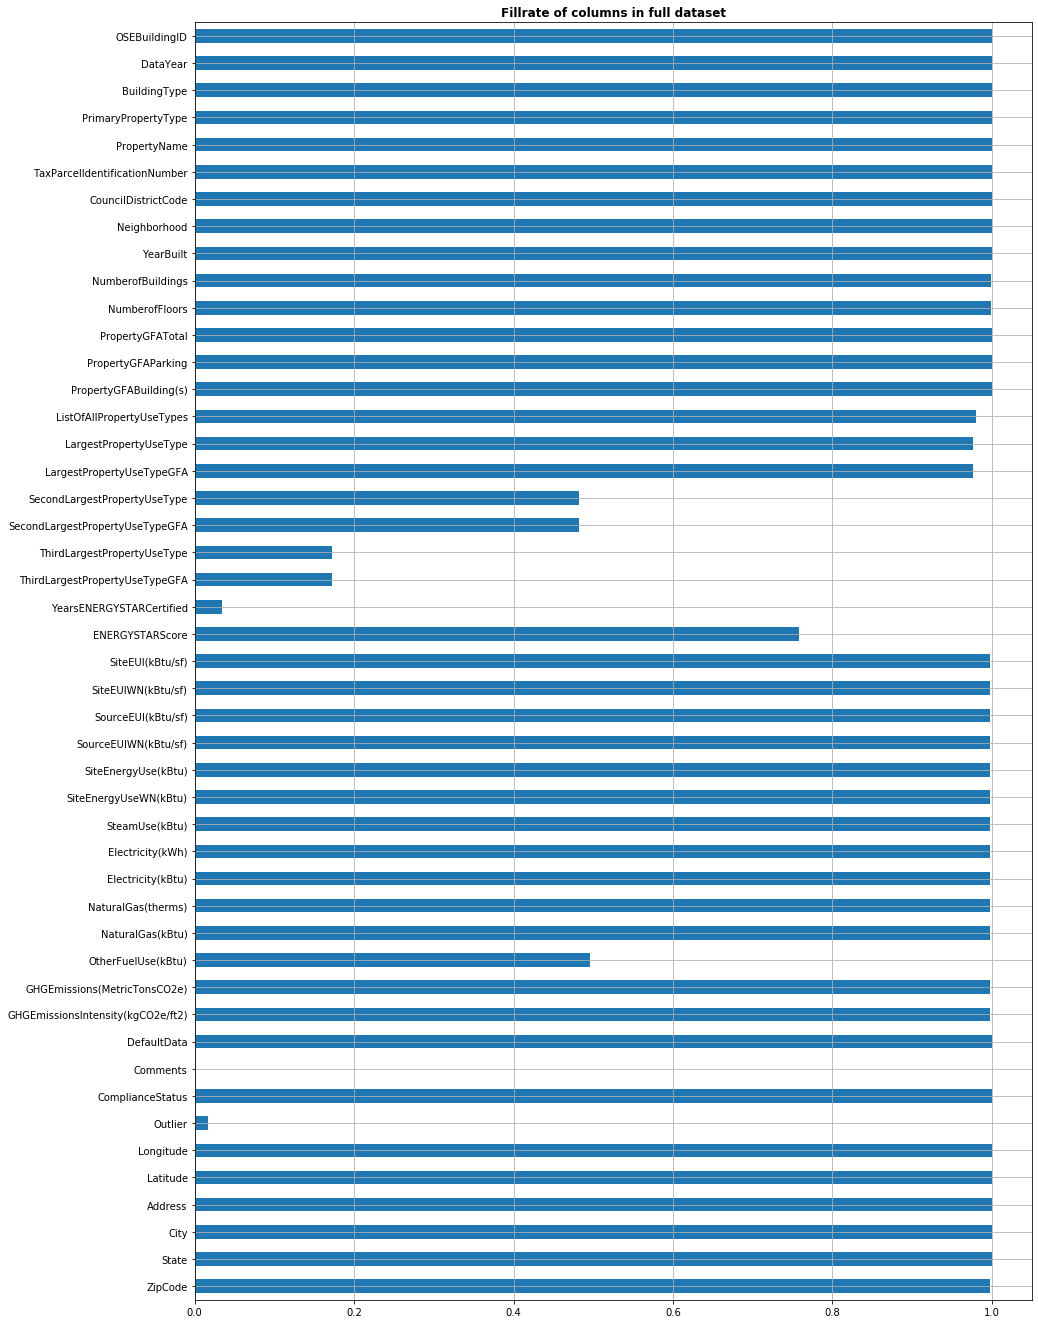

In [5]:
from PElec_01_scripts import df_fillrates
df_fillrates(data, col = 'full dataset')

In [6]:
data_clean = data.copy()

## Deleting columns with too few or not relevant data

### YearsENERGYSTARCertified

In [7]:
data_clean['YearsENERGYSTARCertified'].count()

229

In [8]:
# Data with information on YearsEnergySTAR
data_clean[~data_clean['YearsENERGYSTARCertified'].isna()].sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comments,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
3616,406,2016,NonResidential,Large Office,520 Pike Tower,1975700160,7,DOWNTOWN,1983,1,29,500000,0,500000,"Office, Parking, Retail Store",Office,411301.0,Parking,80005.0,Retail Store,14528.00000,201720152014201220102008,93.0,44.299999,45.200001,139.000000,141.899994,18848780.0,19249572.0,0.0,5524260.500,18848777.0,0.00000,0.0,NaN,131.40,0.26,False,NaN,Compliant,NaN,-122.334940,47.611250,520 Pike Street,Seattle,WA,98101.0
3748,569,2016,NonResidential,Mixed Use Property,Pacific Tower,2829600110,2,GREATER DUWAMISH,1932,1,14,304052,0,304052,"Medical Office, Office, Parking",Office,218918.0,Parking,156487.0,Medical Office,84051.89844,20102008,66.0,69.400002,70.300003,202.899994,203.800003,21027396.0,21290090.0,0.0,5522715.000,18843504.0,21838.90625,2183891.0,NaN,247.35,0.81,False,NaN,Compliant,NaN,-122.315990,47.592800,1200 12th Avenue South,Seattle,WA,98144.0
6481,41987,2016,Multifamily MR (5-9),Mid-Rise Multifamily,WA021_AVA Queen Anne,1989200620,7,MAGNOLIA / QUEEN ANNE,2011,1,6,290520,0,290520,Multifamily Housing,Multifamily Housing,203481.0,NaN,NaN,NaN,NaN,2014,87.0,33.299999,34.799999,73.500000,76.300003,6769410.5,7084125.0,0.0,1101238.625,3757426.0,30119.83789,3011984.0,NaN,186.16,0.64,False,NaN,Compliant,NaN,-122.360160,47.621200,330 3rd Avenue West,Seattle,WA,98119.0
1133,20930,2015,SPS-District K-12,K-12 School,QUEEN ANNE ELEMENTARY (SPS-DISTRICT),1689400145,7,MAGNOLIA / QUEEN ANNE,1925,1,1,48789,0,48789,K-12 School,K-12 School,48789.0,NaN,NaN,NaN,NaN,2016,89.0,31.700000,40.500000,71.500000,86.000000,1545356.0,1976900.0,0.0,261857.000,893493.0,6519.00000,651900.0,0.0,40.85,0.76,False,NaN,Compliant,NaN,-122.348589,47.637673,411 BOSTON ST,SEATTLE,WA,98109.0
3891,751,2016,NonResidential,Large Office,Blanchard Plaza (CoS Energy Reporting),0697000235,7,DOWNTOWN,1983,1,15,378002,116280,261722,"Office, Parking",Office,270237.0,Parking,71602.0,NaN,NaN,2016201320122011201020092008,85.0,65.699997,67.500000,185.600006,185.899994,17750994.0,18235512.0,0.0,4420666.000,15083312.0,26676.80078,2667680.0,NaN,246.83,0.65,False,NaN,Compliant,NaN,-122.341650,47.615990,2201 Sixth Avenue,Seattle,WA,98121.0


### Comments

In [9]:
data_clean["Comments"].count()

13

In [10]:
data_clean.drop(columns = ['Comments'], inplace = True)

### Outlier

In [11]:
data_clean['Outlier'].value_counts(dropna = False)

NaN             6599
High Outlier      46
Low Outlier       38
Low outlier       23
High outlier       9
Name: Outlier, dtype: int64

# Cleaning values

In [12]:
data_clean['Outlier'] = data_clean['Outlier'].mask(data_clean['Outlier'] == 'High outlier', other = 'High Outlier')
data_clean['Outlier'] = data_clean['Outlier'].mask(data_clean['Outlier'] == 'Low outlier', other = 'Low Outlier')
data_clean['Outlier'].unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

## Removing non-residential buildings 

In [13]:
data_clean['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Project is focused on non residential building. 
SPS K-12 : Seattle Public School, Kindergarden to 12th grade

In [14]:
data_clean = data_clean[~data_clean['BuildingType'].str.contains('Multifamily')]

In [15]:
data_clean['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

## Property Types

In [16]:
data_clean['PrimaryPropertyType'].sort_values().unique()

array(['College/University', 'Distribution Center',
       'Distribution Center\n', 'Hospital', 'Hotel', 'K-12 School',
       'Laboratory', 'Large Office', 'Low-Rise Multifamily',
       'Medical Office', 'Mixed Use Property',
       'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Refrigerated Warehouse', 'Residence Hall',
       'Residence Hall/Dormitory', 'Restaurant', 'Restaurant\n',
       'Retail Store', 'SPS-District K-12', 'Self-Storage Facility',
       'Self-Storage Facility\n', 'Senior Care Community',
       'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
       'Supermarket/Grocery Store', 'University', 'Warehouse',
       'Worship Facility'], dtype=object)

In [17]:
data_clean['PrimaryPropertyType'].mask(
    data_clean['PrimaryPropertyType'] == 'Supermarket/Grocery Store',
    other = 'Supermarket / Grocery Store',
    inplace = True
)

In [18]:
data_clean[data_clean['PrimaryPropertyType'] == 'Low-Rise Multifamily']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
1311,21481,2015,Campus,Low-Rise Multifamily,SANITARY MARKET - MASTER CAMPUS FOR PIKE PLACE...,1976200210,7,DOWNTOWN,1942,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,NaN,87.100000,87.100000,273.600000,273.600000,3.863772e+06,3863772.000,0.0,1.132407e+06,3863933.0,0.000000,0.0,0.0,26.94,0.23,False,Compliant,NaN,-122.340810,47.609219,1513 1ST AVE,SEATTLE,WA,98101.0
2480,25674,2015,NonResidential,Low-Rise Multifamily,COMET TAVERN,6003500480,3,EAST,1910,1,3,32100,0,32100,"Bar/Nightclub, Multifamily Housing",Multifamily Housing,21400.0,Bar/Nightclub,10700.0,NaN,NaN,NaN,NaN,2.900000,2.900000,3.500000,3.500000,9.385100e+04,93851.000,0.0,1.929000e+03,6581.0,873.000000,87270.0,0.0,4.68,0.14,False,Compliant,NaN,-122.317243,47.617377,1729 12TH AVE,SEATTLE,WA,98122.0
3980,19445,2016,NonResidential,Low-Rise Multifamily,Pacific Pointe,0354000254,4,LAKE UNION,2000,1,3,93079,36093,56986,Multifamily Housing,Multifamily Housing,91064.0,NaN,NaN,NaN,NaN,NaN,32.0,21.900000,23.000000,63.099998,65.099998,1.997182e+06,2090011.625,0.0,5.111956e+05,1744199.0,2529.819824,252982.0,NaN,25.60,0.28,False,Compliant,NaN,-122.333110,47.648590,2108 N Pacific St.,Seattle,WA,98103.0
4636,21481,2016,Campus,Low-Rise Multifamily,Sanitary Market,1976200210,7,DOWNTOWN,1942,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,NaN,85.199997,85.199997,267.500000,267.500000,3.778355e+06,3778355.000,0.0,1.107372e+06,3778355.0,0.000000,0.0,NaN,26.34,0.58,False,Compliant,NaN,-122.340790,47.609180,1525 FIrst Avenue,Seattle,WA,98101.0
5789,25674,2016,NonResidential,Low-Rise Multifamily,(ID25674) COMET TAVERN,6003500480,3,EAST,1910,1,3,32100,0,32100,"Bar/Nightclub, Multifamily Housing",Multifamily Housing,21400.0,Bar/Nightclub,10700.0,NaN,NaN,NaN,NaN,3.400000,4.500000,4.300000,5.400000,1.082004e+05,142892.500,0.0,3.332500e+03,11370.0,968.300171,96830.0,NaN,5.22,0.16,False,Non-Compliant,Low Outlier,-122.319770,47.614270,916 E PIKE ST,Seattle,WA,98122.0


### Deleting string \n

In [19]:
data_clean[data_clean['PrimaryPropertyType'] == 'Distribution Center\n'].sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
315,446,2015,NonResidential,Distribution Center\n,WASHINGTON STATE FERRIES,2024049060,2,GREATER DUWAMISH,1963,1,1,59090,0,59090,"Distribution Center, Office",Distribution Center,40272.0,Office,18818.0,NaN,NaN,NaN,36.0,51.4,64.9,76.0,90.6,3037572.0,3837262.0,0.0,182708.0,623427.0,24142.0,2414170.0,0.0,132.56,2.20,False,Compliant,NaN,-122.325330,47.548656,6000 6TH AVE S,SEATTLE,WA,98108.0
2952,27494,2015,NonResidential,Distribution Center\n,PWA INC,7327904585,1,GREATER DUWAMISH,1979,1,1,36982,0,36982,"Distribution Center, Office",Distribution Center,34382.0,Office,2600.0,NaN,NaN,NaN,NaN,9.2,10.5,24.0,26.0,338923.0,390007.0,0.0,74588.0,254503.0,844.0,84430.0,0.0,6.26,0.14,False,Compliant,NaN,-122.329564,47.536098,7417 4TH AVE S,SEATTLE,WA,98108.0
542,729,2015,NonResidential,Distribution Center\n,GENSCO INCORPORATED,7666204590,2,GREATER DUWAMISH,1987,1,1,111908,0,111908,Distribution Center,Distribution Center,109090.0,NaN,NaN,NaN,NaN,NaN,69.0,20.7,22.7,53.1,55.3,2255026.0,2481115.0,0.0,480884.0,1640844.0,6143.0,614250.0,0.0,44.06,0.33,False,Compliant,NaN,-122.326892,47.587231,1703 6TH AVE S,SEATTLE,WA,98134.0
1971,23930,2015,NonResidential,Distribution Center\n,ALASKAN COPPER & BRASS; YELLOW CAB,3573200520,2,GREATER DUWAMISH,1968,1,1,160000,0,160000,Distribution Center,Distribution Center,160000.0,NaN,NaN,NaN,NaN,NaN,89.0,9.2,9.2,29.0,29.0,1476506.0,1476506.0,0.0,432739.0,1476567.0,0.0,0.0,0.0,10.29,0.02,True,Compliant,NaN,-122.335317,47.557741,80 S HUDSON ST,SEATTLE,WA,98134.0
1710,23115,2015,NonResidential,Distribution Center\n,"INTERMOUNTAIN SUPPLY, INC.",3124049001,1,DELRIDGE,1979,1,1,42900,0,42900,Distribution Center,Distribution Center,43050.0,NaN,NaN,NaN,NaN,NaN,60.0,9.1,9.9,28.5,31.1,390726.0,426299.0,0.0,114515.0,390742.0,0.0,0.0,0.0,2.72,0.02,False,Compliant,NaN,-122.335699,47.531588,7901 1ST AVE S,SEATTLE,WA,98108.0


In [20]:
data_clean['PrimaryPropertyType'] = data_clean['PrimaryPropertyType'].apply(lambda x : x.replace('\n', ""))

### Removing incorrect property type

In [21]:
data_clean['PrimaryPropertyType'].mask(
    data_clean['PrimaryPropertyType'] == 'Low-Rise Multifamily',
    inplace = True
)

In [22]:
data_clean['PrimaryPropertyType'].sort_values().unique()

array(['College/University', 'Distribution Center', 'Hospital', 'Hotel',
       'K-12 School', 'Laboratory', 'Large Office', 'Medical Office',
       'Mixed Use Property', 'Non-Refrigerated Warehouse', 'Office',
       'Other', 'Refrigerated Warehouse', 'Residence Hall',
       'Residence Hall/Dormitory', 'Restaurant', 'Retail Store',
       'SPS-District K-12', 'Self-Storage Facility',
       'Senior Care Community', 'Small- and Mid-Sized Office',
       'Supermarket / Grocery Store', 'University', 'Warehouse',
       'Worship Facility', nan], dtype=object)

## Neighborhood

In [23]:
data_clean['Neighborhood'].sort_values().unique()

array(['BALLARD', 'Ballard', 'CENTRAL', 'Central', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS', 'DOWNTOWN', 'Delridge', 'EAST',
       'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
       'NORTHEAST', 'NORTHWEST', 'North', 'Northwest', 'SOUTHEAST',
       'SOUTHWEST'], dtype=object)

In [24]:
# Upper casing
data_clean['Neighborhood'] = data_clean['Neighborhood'].str.upper()

In [25]:
# Dealing with delridge heights
data_clean[data_clean['Neighborhood'].str.contains('DELRIDGE')]['Neighborhood'].value_counts()

DELRIDGE                  91
DELRIDGE NEIGHBORHOODS     1
Name: Neighborhood, dtype: int64

In [26]:
data_clean['Neighborhood'] = data_clean['Neighborhood'].apply(lambda x : x.replace(' NEIGHBORHOODS', ""))

## Year Built

In [27]:
data_clean['YearBuilt'].sort_values().unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015], dtype=int64)

No construction absurd year or year before foundation of Seattle (1857)

## PropertyGFATotal

GFA : Gross Floor Area. Includes all floors (https://assetinsights.net/Glossary/G_Gross_Floor_Area.html)

In [28]:
data_clean['PropertyGFATotal'].sort_values().unique()

array([  11285,   11685,   11968, ..., 1952220, 2200000, 9320156],
      dtype=int64)

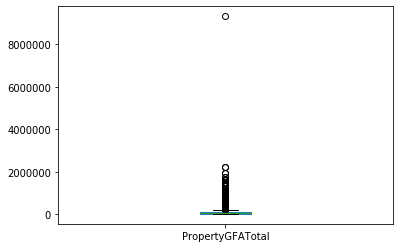

In [29]:
# Distribution of values
data_clean['PropertyGFATotal'].plot(kind = 'box')

In [30]:
# Extreme outlier
data_clean[data_clean['PropertyGFATotal'] == data_clean['PropertyGFATotal'].max()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
6613,49967,2016,Campus,University,University of Washington - Seattle Campus,1625049001,4,NORTHEAST,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,NaN,11140.56,1.2,False,Compliant,NaN,-122.31041,47.65644,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0


Due to massive size of the campus (https://www.washington.edu/maps/), the huge value for GFA does not seems absurd

In [31]:
data_clean.sort_values(by = 'PropertyGFATotal', ascending = False).head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
6613,49967,2016,Campus,University,University of Washington - Seattle Campus,1625049001,4,NORTHEAST,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,8.498524e+07,192577488.0,657074389.0,0.00000,0.0,NaN,11140.56,1.20,False,Compliant,NaN,-122.310410,47.656440,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0
4831,22062,2016,Campus,University,Entire Campus,2254500880,3,EAST,1939,1,2,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,NaN,66.699997,71.599998,145.000000,151.300003,114648520.0,123205560.0,0.000000e+00,18075270.0,61672821.0,529756.93750,52975694.0,NaN,3243.48,1.47,False,Compliant,NaN,-122.317110,47.610650,901 12th Avenue,Seattle,WA,98122.0
1508,22062,2015,Campus,College/University,SEATTLE UNIVERSITY (MAIN CAMPUS),2254500880,3,EAST,1939,39,2,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,NaN,66.900000,76.400000,146.100000,158.300000,115080128.0,131427232.0,0.000000e+00,18292370.0,62416157.0,526666.00000,52666569.0,0.0,3232.23,1.35,False,Compliant,NaN,-122.314594,47.608697,901 12TH AVE,SEATTLE,WA,98122.0
3914,775,2016,NonResidential,Large Office,Columbia Center - 2015,0942000640,7,DOWNTOWN,1985,1,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,92937640.0,92537256.0,0.000000e+00,25747908.0,87851862.0,50857.63281,5085763.0,NaN,882.56,0.45,False,Compliant,NaN,-122.330720,47.604540,701 5th Avenue,Seattle,WA,98104.0
581,775,2015,NonResidential,Large Office,COLUMBIA CENTER,942000640,7,DOWNTOWN,1985,1,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,"2016, 2015, 2012, 2009, 2007, 2006",84.0,56.300000,55.500000,171.900000,169.100000,94560088.0,93255440.0,0.000000e+00,26597630.0,90754881.0,38090.00000,3808965.0,0.0,834.96,0.23,False,Compliant,NaN,-122.330286,47.604660,701 5TH AVE,SEATTLE,WA,98104.0
3953,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,EAST,1994,7,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,1.349435e+08,40842564.0,139354828.0,173161.20310,17316120.0,NaN,12307.16,6.97,False,Compliant,NaN,-122.322402,47.608951,747 Broadway,Seattle,WA,98122.0
621,828,2015,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,1978201096,3,EAST,1994,1,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,59.0,174.900000,178.600000,374.600000,372.000000,286685536.0,292746272.0,1.278697e+08,41161340.0,140448322.0,183733.00000,18373320.0,0.0,11824.89,6.35,False,Compliant,NaN,-122.322402,47.608951,747 BROADWAY,SEATTLE,WA,98122.0
3631,422,2016,NonResidential,Large Office,Two Union Square,1976700125,7,DOWNTOWN,1989,1,56,1605578,389860,1215718,"Office, Other, 

## Other categorical columns

In [32]:
data_clean['LargestPropertyUseType'].sort_values().unique()

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse',
       'Data Center', 'Distribution Center', 'Financial Office',
       'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Service',
       'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
       'Laboratory', 'Library', 'Lifestyle Center',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Movie Theater', 'Multifamily Housing', 'Museum',
       'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Education', 'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Other - Utility',
       'Other/Specialty Hospital',
       'Outpatient Rehabilitation/Physical Therapy', 'Parking',
       'Performing Arts',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)

In [33]:
data_clean[data_clean['LargestPropertyUseType'].isin(
    ['Multifamily Housing', 'Other - Lodging/Residential'])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Longitude,Latitude,Address,City,State,ZipCode
113,180,2015,NonResidential,Other,UNION GOSPEL MISSION ASSN / HOPE PLACE,7378600265,2,GREATER DUWAMISH,2009,1,5,89821,0,89821,"Food Service, Office, Other - Lodging/Residential",Other - Lodging/Residential,46483.0,Office,37938.0,Food Service,4579.0,NaN,NaN,22.700000,26.300000,25.300000,29.300000,2.017694e+06,2.337736e+06,0.0,1.901500e+04,64880.0,19528.000000,1952816.0,0.0,104.17,1.16,False,Compliant,NaN,-122.284053,47.538300,3802 S OTHELLO ST,SEATTLE,WA,98118.0
163,264,2015,NonResidential,Mixed Use Property,TRIBECA CONDOS & STORE,8681450000,7,MAGNOLIA / QUEEN ANNE,2002,1,4,110785,39179,71606,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,58563.0,Supermarket/Grocery Store,48520.0,Parking,29839.0,NaN,NaN,95.800000,99.400000,293.500000,303.500000,1.060879e+07,1.101520e+07,0.0,2.997659e+06,10228437.0,3808.000000,380776.0,0.0,91.53,0.43,False,Compliant,NaN,-122.357643,47.623924,516 1ST AVE W,SEATTLE,WA,98119.0
1170,21122,2015,NonResidential,Mixed Use Property,FREMONT COURT - EQUINOX,1972202755,6,LAKE UNION,2001,1,3,41827,9226,32601,"Multifamily Housing, Office, Other - Mall, Par...",Multifamily Housing,14273.0,Office,14128.0,Parking,9680.0,NaN,NaN,101.600000,103.900000,231.500000,234.000000,4.248084e+06,4.345708e+06,0.0,7.323950e+05,2499034.0,17492.000000,1749154.0,0.0,110.32,2.38,False,Compliant,NaN,-122.349348,47.650185,3420 FREMONT AVE N,SEATTLE,WA,98103.0
1311,21481,2015,Campus,NaN,SANITARY MARKET - MASTER CAMPUS FOR PIKE PLACE...,1976200210,7,DOWNTOWN,1942,1,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing...",Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,NaN,87.100000,87.100000,273.600000,273.600000,3.863772e+06,3.863772e+06,0.0,1.132407e+06,3863933.0,0.000000,0.0,0.0,26.94,0.23,False,Compliant,NaN,-122.340810,47.609219,1513 1ST AVE,SEATTLE,WA,98101.0
1858,23562,2015,NonResidential,Mixed Use Property,THE TRAVELERS HOTEL,8670450000,7,DOWNTOWN,1913,1,3,43878,0,43878,"Multifamily Housing, Non-Refrigerated Warehous...",Multifamily Housing,12000.0,Office,8262.0,Retail Store,6312.0,NaN,NaN,22.500000,22.400000,70.700000,70.300000,7.396620e+05,7.358970e+05,0.0,2.167820e+05,739692.0,0.000000,0.0,0.0,5.16,0.04,False,Compliant,NaN,-122.335204,47.601800,80 YESLER WAY,SEATTLE,WA,98104.0
1950,23863,2015,NonResidential,Other,WM BOOTH CNTR,7666202690,2,GREATER DUWAMISH,1992,1,3,47836,7572,40264,"Other - Lodging/Residential, Parking",Other - Lodging/Residential,43336.0,Parking,4500.0,NaN,NaN,NaN,NaN,79.100000,83.200000,165.800000,172.700000,3.428334e+06,3.605154e+06,0.0,5.029390e+05,1716099.0,17123.000000,1712306.0,0.0,102.90,2.00,False,Compliant,NaN,-122.325440,47.595407,811 MAYNARD AVE S,SEATTLE,WA,98134.0
2341,25222,2015,NonResidential,Mixed Use Property,OLIVE 8,6364000000,7,DOWNTOWN,2009,1,39,1074552,112124,962428,"Hotel, Multifamily Housing, Parking",Multifamily Housing,311521.0,Hotel,303000.0,Parking,141450.0,NaN,62.0,44.400000,45.400000,118.500000,116.800000,2.727354e+07,2.789872e+07,0.0,6.192557e+06,21129882.0,61445.000000,6144534.0,0.0,473.63,0.36,False,Compliant,NaN,-122.334053,47.613564,737 OLIVE WAY,SEATTLE,WA,98101.0
2421,25522,2015,NonReside

In [34]:
# Removing building of which largest use is residential
data_clean = data_clean[
    ~data_clean['LargestPropertyUseType'].isin(['Multifamily Housing', 'Other - Lodging/Residential'])
]

In [35]:
data_clean['ComplianceStatus'].sort_values().unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [36]:
data_clean['City'].sort_values().unique()

array(['SEATTLE', 'Seattle'], dtype=object)

In [37]:
data_clean['City'] = 'Seattle'

In [38]:
data_clean['State'].sort_values().unique()

array(['WA'], dtype=object)

# Removing unnecessary columns

In [39]:
data_clean.drop(
    columns = ['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber',
               'ListOfAllPropertyUseTypes', 'YearsENERGYSTARCertified', 'City', 'State'] ,
    inplace = True
)

# Storing cleaned dataset

In [40]:
data_clean.to_pickle('Seattle-cleaned.pkl')